Libraries 

In [190]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.plotting import boxplot
from matplotlib.pyplot import figure
import math
import scipy.stats as stats
from scipy import stats as st
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from prettytable import PrettyTable
from scipy.stats import skewnorm
from scipy.stats import kurtosis
from scipy.stats import skew
import scipy.stats as stats

Import file

In [ ]:
#read the file
df = pd.read_csv("MATHS_M1_DATA_roller_coaster.csv", sep=',')
df

,speed,height
0,96.630140,295.740395
1,101.856351,327.643919
2,104.220304,340.903072
3,88.900317,272.121005
4,98.969320,310.646822
...,...,...
495,88.296017,279.790799
496,87.711732,256.606158
497,92.833393,275.494358
498,100.539139,305.961290


In [ ]:
# check columns types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   speed   500 non-null    float64
 1   height  500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


pas de valeur null ni des erreurs dans l'insertion du fiche, donc je commence mon analyse

# PART1: CLASSIFICTION

In [ ]:
#1 classification
#2 formules
N=len(df["speed"])
Min = min(df["speed"])
Max = max(df["speed"])

In [ ]:
#mettre les formules en forme de table
def nombre_de_classes(X):
  N=len(X)
  Min = min(X)
  Max = max(X)
  diff = Max - Min
  std = np.std(X,ddof=1)
  Q1 = np.quantile(X,0.25)
  Q3 = np.quantile(X,0.75)
  EIQ = Q3-Q1
  k1 = np.sqrt(N)
  k2 = 10/3 * np.log10(N) + 1
  k3 = 2 * ((N)**(1/3))
  k4 = (diff) / (3.5 * std * N**(-1/3))
  k5 = (diff)/ (2*(EIQ/(N)**(1/3)))

  tab = PrettyTable()
  tab.field_names=["Regles","Valeur"]
  tab.add_row(["Racine carrée",np.ceil(k1)])
  tab.add_row(["Règle de Sturges",np.ceil(k2)])
  tab.add_row(["Règle de Rice",np.ceil(k3)])
  tab.add_row(["Règle de Scott",np.ceil(k4)])
  tab.add_row(["Règle de Freedman-Diaconis",np.ceil(k5)])

  print(tab)

In [ ]:
nombre_de_classes(df["speed"])

+----------------------------+--------+
|           Regles           | Valeur |
+----------------------------+--------+
|       Racine carrée        |  23.0  |
|      Règle de Sturges      |  10.0  |
|       Règle de Rice        |  16.0  |
|       Règle de Scott       |  17.0  |
| Règle de Freedman-Diaconis |  24.0  |
+----------------------------+--------+


In [ ]:
#3 regle de sturge
def sturges_rule(data):
    n = len(data)
    num_classes = math.ceil(1 + math.log2(n))
    return num_classes

num_classes = sturges_rule(df["speed"])

print("Number of classes:", num_classes)

Number of classes: 10


On utilise 10 classes pour calcule notre intervalle de speed

In [ ]:
def intervalles_classes(X,k):
  Min = min(X)
  Max = max(X)
  IC =np.ceil((Max-Min) / k)

  I=[]
  for i in range(0,k):
    bmin = Min
    bmax = Min+IC
    I.append([bmin,bmax])
    Min = bmax  

  tab = PrettyTable()
  tab.field_names=(["ci"])
  for i in range(0,len(I)):
    tab.add_row(['['+str(I[i][0])+";"+str(I[i][1])+'['])

  print(tab)
  return I

In [ ]:
IC = intervalles_classes(df["speed"],10)

+---------------+
|       ci      |
+---------------+
|  [75.0;81.0[  |
|  [81.0;87.0[  |
|  [87.0;93.0[  |
|  [93.0;99.0[  |
|  [99.0;105.0[ |
| [105.0;111.0[ |
| [111.0;117.0[ |
| [117.0;123.0[ |
| [123.0;129.0[ |
| [129.0;135.0[ |
+---------------+


J'ai mon intervalle, je peux calculer l'effectif, frequencce et frequence cumule

In [ ]:
def tableau_effectifs_frequences_groupees(X,IC):

  #Effectif
  ni=[]
  for i in IC:
    bMin = i[0]
    bMax = i[1]
    n=0
    for x in X:
      if (x>= bMin and x<bMax):
        n+=1
    ni.append(n)

  #Frequences
  N= len(X)
  fi = []
  for n in ni:
    fi.append(n/N)

  #Frequences cumulées
  ficum = []
  somme=0
  for f in fi:
    somme += f
    ficum.append(somme)

  tab = PrettyTable()
  tab.field_names=(["ci","ni","fi","fi cumulées"])
  for i in range(0,len(IC)):
    intervalle = '['+str(IC[i][0])+";"+str(IC[i][1])+'['
    n = ni[i]
    f = fi[i]
    cf= ficum[i]
    tab.add_row([intervalle,n,round(f,2),round(cf,2)])

  print(tab)

In [ ]:
tableau_effectifs_frequences_groupees(df["speed"],IC)

+---------------+-----+------+-------------+
|       ci      |  ni |  fi  | fi cumulées |
+---------------+-----+------+-------------+
|  [75.0;81.0[  |  1  | 0.0  |     0.0     |
|  [81.0;87.0[  |  6  | 0.01 |     0.01    |
|  [87.0;93.0[  |  55 | 0.11 |     0.12    |
|  [93.0;99.0[  | 126 | 0.25 |     0.38    |
|  [99.0;105.0[ | 165 | 0.33 |     0.71    |
| [105.0;111.0[ |  92 | 0.18 |     0.89    |
| [111.0;117.0[ |  48 | 0.1  |     0.99    |
| [117.0;123.0[ |  4  | 0.01 |     0.99    |
| [123.0;129.0[ |  1  | 0.0  |     1.0     |
| [129.0;135.0[ |  2  | 0.0  |     1.0     |
+---------------+-----+------+-------------+


# PART2: analyse univariée

décrire et mesurer la répartition des valeurs que peut prendre une variable

In [ ]:
#1 because the height is a quantitive value and not qualitative
#2 formulas:

#**2: indicateur de position

##mean

In [ ]:
y = np.zeros(len(df["speed"]))
x = df["speed"]

In [ ]:
np.mean(df["speed"])

101.4776883077428

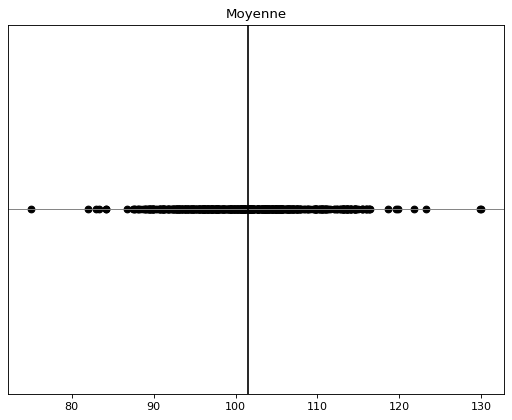

In [ ]:
figure(figsize=(8, 6), dpi=80)
plt.plot(x, y, 'o',color="black")
plt.axhline(y=0, color='gray', linewidth=0.85)
ax = plt.gca()
ax.get_yaxis().set_visible(False)
plt.title("Moyenne")
plt.axvline(np.mean(x),color="Black")
plt.show()

some utliers on the edges

##median

In [ ]:
df.speed.median()

101.30202913725138

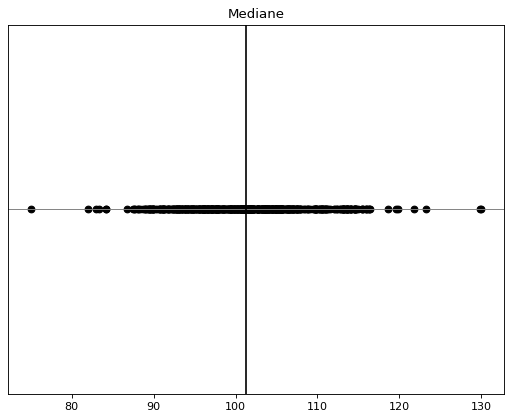

In [ ]:
figure(figsize=(8, 6), dpi=80)
plt.plot(df["speed"], np.zeros(len(df["speed"])), 'o',color="black")
plt.axhline(y=0, color='gray', linewidth=0.85)
plt.title("Mediane")
ax = plt.gca()
ax.get_yaxis().set_visible(False)
plt.axvline(np.median(df["speed"]),color="black")
plt.show()

il y a quelques valeurs aberantes

##mode

In [ ]:
def mode(X):
  u = np.unique(X)
  n=[]
  for v in u:
    ni = np.count_nonzero(X==v)
    n.append(ni)

  vMax = max(n)

  modes = []
  for i in range(0,len(u)):
    if n[i] == vMax:
      modes.append(u[i])
  print("Mode(s) = ",modes, " - effectif :",vMax)

In [ ]:
  mode(df["speed"])

Mode(s) =  [75.0, 81.94823428345273, 83.01184815028775, 83.29745247733055, 84.15029915964483, 84.1949030841231, 86.81445976717434, 87.49802568566187, 87.60119449244569, 87.71173222643532, 88.09316432982808, 88.13296718281033, 88.29601734339414, 88.65674295166849, 88.90031699303647, 88.90924830496658, 89.08489687421743, 89.32588504730558, 89.33296827507345, 89.43320526743909, 89.58803503176122, 89.58919472740189, 89.62967813133042, 89.65109370100188, 89.82882024578903, 89.9321807683959, 89.93668281218557, 89.95385929462293, 89.97437021119474, 90.2143369633134, 90.39959192874966, 90.67018987194048, 90.76320079660957, 90.77488513272247, 90.7795621384893, 90.99063018125938, 91.0749264562131, 91.1356111052875, 91.14241325748216, 91.17381091836312, 91.30021734812529, 91.33348993163764, 91.35813427622404, 91.69205468618736, 91.79732147288622, 91.82276588755198, 91.84714752539524, 91.9062745451711, 92.15959730096532, 92.29606519903076, 92.4253006118009, 92.42653094573456, 92.4755601329028, 92.

In [ ]:
st.mode(df["speed"])

<ipython-input-63-2f68be7d6aea>:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  st.mode(df["speed"])


ModeResult(mode=array([75.]), count=array([1]))

##quantile

In [ ]:
X = sorted(df["speed"])
n = len(df["speed"])
alpha = 0.1
i = (n-1)*alpha
f = i - int(i)
g=int(i)
d=g+1
print("i:",i)
print("f:",f)
print("g:",g)
print("d:",d)
print("Xg : ",X[g])
print("Xd : ",X[d])
print("Q(X):",X[g] + (X[d] - X[g]) * f)

i: 49.900000000000006
f: 0.9000000000000057
g: 49
d: 50
Xg :  92.29606519903076
Xd :  92.4253006118009
Q(X): 92.41237707052389


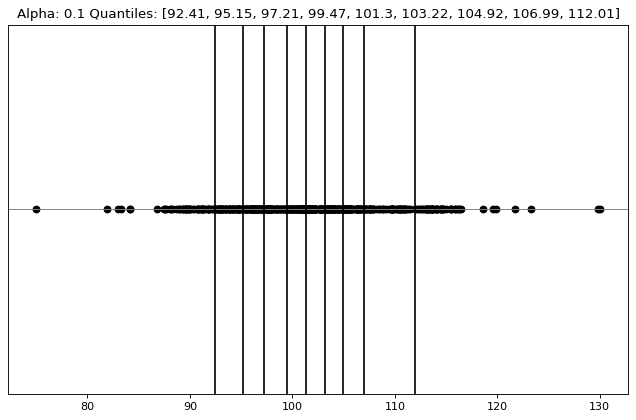

In [ ]:
alpha = 0.10
nb = (100/(100*alpha))-1
quantiles=[]

a= alpha
for i in range(0,int(nb)):
  quantiles.append(round(np.quantile(df["speed"],a),2))
  a += alpha

figure(figsize=(10, 6), dpi=80)
plt.plot(df["speed"], np.zeros(len(df["speed"])), 'o',color="black")
plt.axhline(y=0, color='gray', linewidth=0.85)
plt.title("Alpha: "+str(alpha)+" Quantiles: "+str(quantiles))
ax = plt.gca()
ax.get_yaxis().set_visible(False)

for q in quantiles:
  plt.axvline(q,color="black")

plt.show()

the density of values is the most in the middle
we don't have many values at the edges only a few, which means our data is mostly focused on the middle classes

##Quartiles

<Axes: >

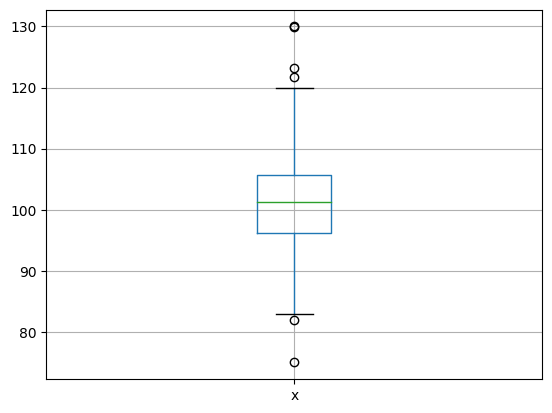

In [ ]:
# boxplot for column to check values
boxplot(df.speed)

as seen in the quantile there are some outliers on the edges

##**3: CARACTERISTIQUES DE DISPERSION**

### Etendue

In [ ]:
e = df["speed"].max() - df["speed"].min()
print(e)

55.0


###Ecart inter-quartiles

In [ ]:
Q1 = np.quantile(df["speed"],0.25)
Q3 = np.quantile(df["speed"],0.75)
EIQ = Q3-Q1
print(EIQ)

9.476828093473856


## Variance

In [ ]:
np.var(df["speed"],ddof=1)

56.26651877471221

## Ecart type

In [ ]:
np.std(df["speed"])

7.493596315332364

## Coefficient de variation

In [ ]:
st.variation(df["speed"], ddof=1)

0.07391872337553698

##**4: CARACTERISTIQUES DE FORMES**

###Coefficient d'asymetrie de Fisher (Skewness)

In [ ]:
#Scipy avec Biais
print(skew(df["speed"]))

#Scipy sans biais
print(skew(df["speed"],bias=False))

0.247459190978681
0.24820442563676942


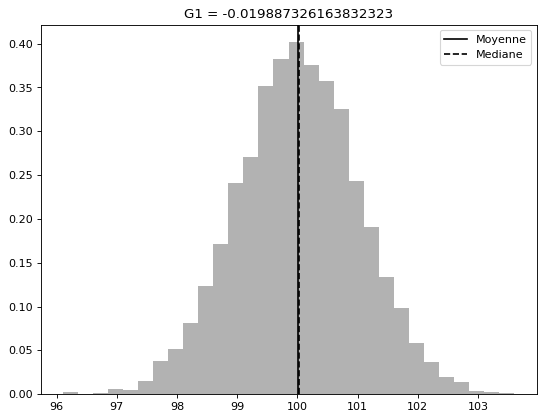

In [ ]:
numValues = 10000
maxValue = 100
skewness = 0
random = skewnorm.rvs(a = skewness,loc=maxValue, size=numValues) 
df=pd.DataFrame(random,columns=["speed"])
g1 = skew(random,bias=False)
figure(figsize=(8, 6), dpi=80)
plt.hist(random,30,density=True, color = 'gray', alpha=0.6)
plt.title("G1 = "+str(g1))
plt.axvline(np.mean(random),color="black",label="Moyenne")
plt.axvline(np.median(random),linestyle="--",color="black",label="Mediane")
plt.legend()
plt.show()

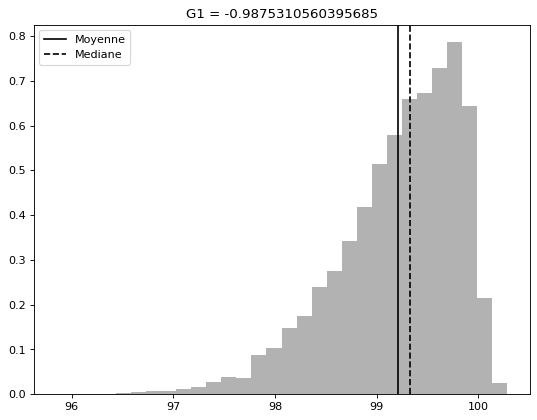

In [ ]:
numValues = 10000
maxValue = 100
skewness = -10
random = skewnorm.rvs(a = skewness,loc=maxValue, size=numValues) 
df=pd.DataFrame(random,columns=["speed"])
g1 = skew(random,bias=False)
figure(figsize=(8, 6), dpi=80)
plt.hist(random,30,density=True, color = 'gray', alpha=0.6)
plt.axvline(np.mean(random),color="black",label="Moyenne")
plt.axvline(np.median(random),linestyle="--",color="black",label="Mediane")
plt.legend()
plt.title("G1 = "+str(g1))
plt.show()

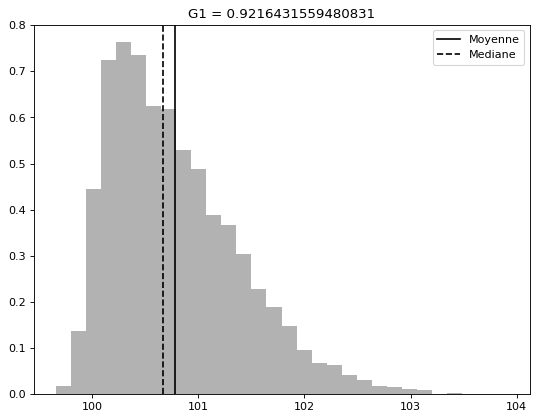

In [ ]:
numValues = 10000
maxValue = 100
skewness = 8
random = skewnorm.rvs(a = skewness,loc=maxValue, size=numValues) 
df=pd.DataFrame(random,columns=["speed"])
g1 = skew(random,bias=False)
figure(figsize=(8, 6), dpi=80)
plt.hist(random,30,density=True, color = 'gray', alpha=0.6)
plt.title("G1 = "+str(g1))
plt.axvline(np.mean(random),color="black",label="Moyenne")
plt.axvline(np.median(random),linestyle="--",color="black",label="Mediane")
plt.legend()
plt.show()

data is more disperesed at the edges

### Coefficient d'aplatissement de Fisher (Kurtosis)

In [ ]:
#Scipy avec biais 
print(kurtosis(df["speed"]))

#Scipy sans biais 
print(kurtosis(df["speed"],bias=False))

0.7169781304230916
0.7179369886714273


In [ ]:
#Différentes loi de distributions
laplace = getattr(stats, 'laplace')
cosinus = getattr(stats, 'cosine')
normale = getattr(stats, 'norm')

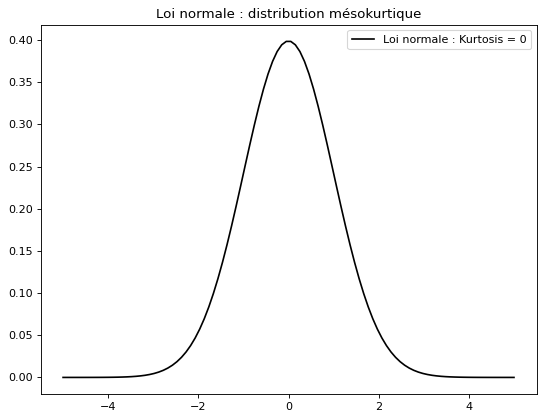

In [ ]:
x = np.linspace(-5, 5, 100)
datasNormale = normale.rvs(size=1000)
yNormale = normale.pdf(x)

figure(figsize=(8, 6), dpi=80)
plt.plot(x,yNormale,color="black",label=("Loi normale : Kurtosis = "+str(round(kurtosis(datasNormale,bias=False)))))
plt.title("Loi normale : distribution mésokurtique")
plt.legend()
plt.show()

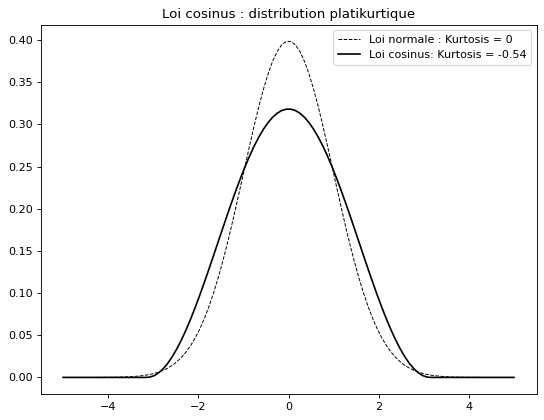

In [ ]:
#Loi Normale / Loi Cosinus
x = np.linspace(-5, 5, 100)
datasNormale = normale.rvs(size=1000)
yNormale = normale.pdf(x)

datasCosinus = cosinus.rvs(size=1000)
yCosinus = cosinus.pdf(x)

figure(figsize=(8, 6), dpi=80)
plt.plot(x,yNormale,color="black",linestyle="--",linewidth=0.87,label=("Loi normale : Kurtosis = "+str(round(kurtosis(datasNormale,bias=False)))))
plt.plot(x,yCosinus,color="black",label=("Loi cosinus: Kurtosis = "+str(round(kurtosis(datasCosinus,bias=False),2))))
plt.title("Loi cosinus : distribution platikurtique")
plt.legend()
plt.show()

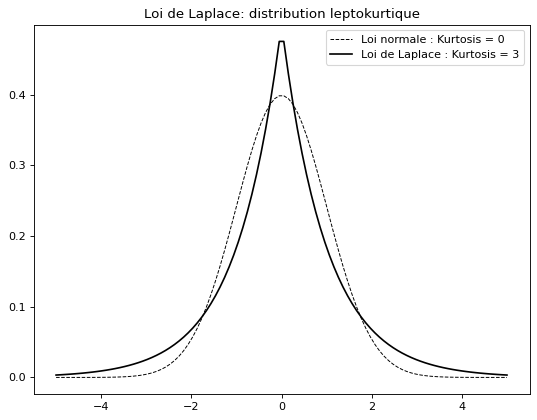

In [ ]:
#Loi Normale / Loi de Laplace
x = np.linspace(-5, 5, 100)
datasNormale = normale.rvs(size=1000)
yNormale = normale.pdf(x)

datasLaplace = laplace.rvs(size=1000)
yLaplace = laplace.pdf(x)

figure(figsize=(8, 6), dpi=80)
plt.plot(x,yNormale,color="black",linestyle="--",linewidth=0.87,label=("Loi normale : Kurtosis = "+str(round(kurtosis(datasNormale,bias=False)))))
plt.plot(x,yLaplace,color="black",label=("Loi de Laplace : Kurtosis = "+str(round(kurtosis(datasLaplace,bias=False)))))
plt.title("Loi de Laplace: distribution leptokurtique")
plt.legend()
plt.show()

#PART3: Analyse bivariée

étude des relations entre deux variables, celles-ci pouvant être quantitatives ou qualitatives

- Covariance
- Coeff de correlation linéaire

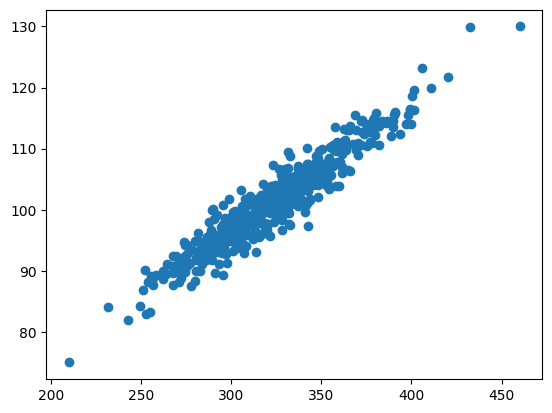

In [ ]:
plt.scatter(df.height, df.speed)

We can deduct that when speed is increasung the height is also increasing, so we have a positive covariance that is evoluting positively 

In [ ]:
np.cov(df.height,df.speed)

array([[1195.80401224,  247.09859248],
       [ 247.09859248,   56.26651877]])

In [ ]:
# calcul de la moyenne de chaque ensemble de données
X = df.height
Y = df.speed

moyenne_x = sum(X) / len(X)
moyenne_y = sum(Y) / len(Y)

# calcul de la variance de chaque ensemble de données
variance_x = sum((Xi - moyenne_x) ** 2 for Xi in X) / (len(X) - 1)
variance_y = sum((Yi - moyenne_y) ** 2 for Yi in Y) / (len(Y) - 1)

# calcul de l'écart-type de chaque ensemble de données
ecart_type_x = math.sqrt(variance_x)
ecart_type_y = math.sqrt(variance_y)

# calcul de la covariance entre les deux ensembles de données
covariance = sum((X[i] - moyenne_x) * (Y[i] - moyenne_y) for i in range(len(X))) / (len(X) - 1)

# calcul du coefficient de corrélation linéaire
coefficient_corr = covariance / (ecart_type_x * ecart_type_y)

# affichage du résultat
print("Le coefficient de corrélation linéaire entre x et y est :", coefficient_corr)

Le coefficient de corrélation linéaire entre x et y est : 0.9526102395890808


##PART 4 : LINEAR REGRESSION

équation : Pointure_estimée = Beta0 + Beta1 * Taille1

- Calcul de Beta 0 et Beta 1
- Faire la prédiction
- Evaluation de l'algo (MSE, RMSE, R2)
- Conclusion générale

boite a moustache pour identifier les valeurs aberrantes 

In [ ]:
df1 = pd.DataFrame(X,columns=["X"])
df2 = pd.DataFrame(Y,columns=["Y"])

def mode(X):
  u = np.unique(X)
  n=[]
  for v in u:
    ni = np.count_nonzero(X==v)
    n.append(ni)

  vMax = max(n)

  modes = []
  for i in range(0,len(u)):
    if n[i] == vMax:
      modes.append(u[i])
  print("Mode(s) = ",modes, " - effectif :",vMax)

  df1["X"].median()

  df2["Y"].median()

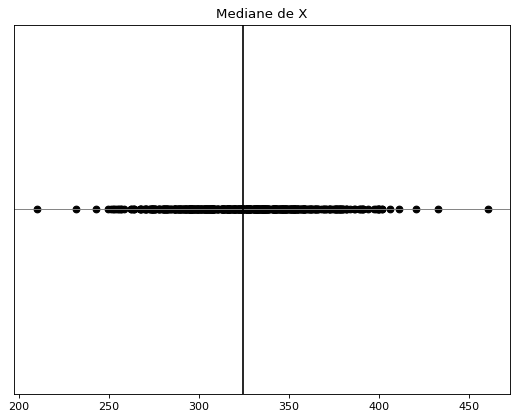

In [ ]:
figure(figsize=(8, 6), dpi=80)
plt.plot(X, np.zeros(len(X)), 'o',color="black")
plt.axhline(y=0, color='gray', linewidth=0.85)
plt.title("Mediane de X")
ax = plt.gca()
ax.get_yaxis().set_visible(False)
plt.axvline(np.median(X),color="black")
plt.show()

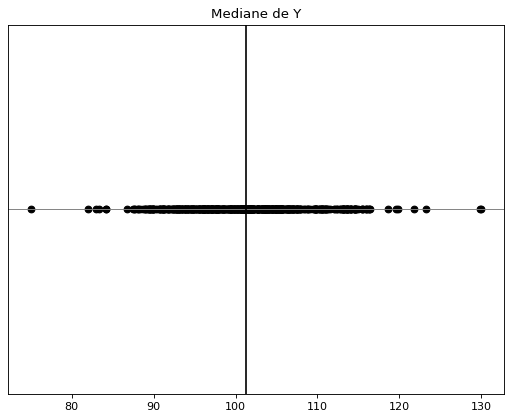

In [ ]:
figure(figsize=(8, 6), dpi=80)
plt.plot(Y, np.zeros(len(Y)), 'o',color="black")
plt.axhline(y=0, color='gray', linewidth=0.85)
plt.title("Mediane de Y")
ax = plt.gca()
ax.get_yaxis().set_visible(False)
plt.axvline(np.median(Y),color="black")
plt.show()

In [ ]:
print(sorted(X))

[210.0, 231.90309904223352, 243.1035498365612, 249.37735409963625, 251.36683935389908, 252.36098676472187, 252.8575188138065, 254.18165464161297, 255.1648374481948, 255.43204655472988, 256.6061581178432, 256.79966571392083, 258.42128467538583, 262.0942849012112, 262.24584501005256, 263.43775576156, 263.8530118006194, 264.1966857272871, 267.39187120479346, 267.5762748378248, 267.6128167913971, 268.0363670960276, 269.5786646341486, 270.16187802075206, 270.6814793462327, 270.8287483215729, 270.84086551812493, 272.12100508345424, 272.649869077987, 273.1936599286411, 273.6243828047484, 273.8259888860051, 274.0160506507399, 274.1039586373108, 274.34652167233173, 274.4546074215794, 274.6251715517064, 274.82296942700225, 275.4943584518155, 275.58944842905646, 275.6751578545806, 277.41900220243804, 277.6913956718547, 277.69926873713723, 278.25479837887883, 279.79079899044655, 280.2524840246143, 280.3245309512365, 280.6037556901392, 280.6342317294438, 280.8487226882584, 281.2018615420292, 281.43

In [ ]:
print(sorted(Y))

[75.0, 81.94823428345273, 83.01184815028775, 83.29745247733055, 84.15029915964483, 84.1949030841231, 86.81445976717434, 87.49802568566187, 87.60119449244569, 87.71173222643532, 88.09316432982808, 88.13296718281033, 88.29601734339414, 88.65674295166849, 88.90031699303647, 88.90924830496658, 89.08489687421743, 89.32588504730558, 89.33296827507345, 89.43320526743909, 89.58803503176122, 89.58919472740189, 89.62967813133042, 89.65109370100188, 89.82882024578903, 89.9321807683959, 89.93668281218557, 89.95385929462293, 89.97437021119474, 90.2143369633134, 90.39959192874966, 90.67018987194048, 90.76320079660957, 90.77488513272247, 90.7795621384893, 90.99063018125938, 91.0749264562131, 91.1356111052875, 91.14241325748216, 91.17381091836312, 91.30021734812529, 91.33348993163764, 91.35813427622404, 91.69205468618736, 91.79732147288622, 91.82276588755198, 91.84714752539524, 91.9062745451711, 92.15959730096532, 92.29606519903076, 92.4253006118009, 92.42653094573456, 92.4755601329028, 92.48325879925

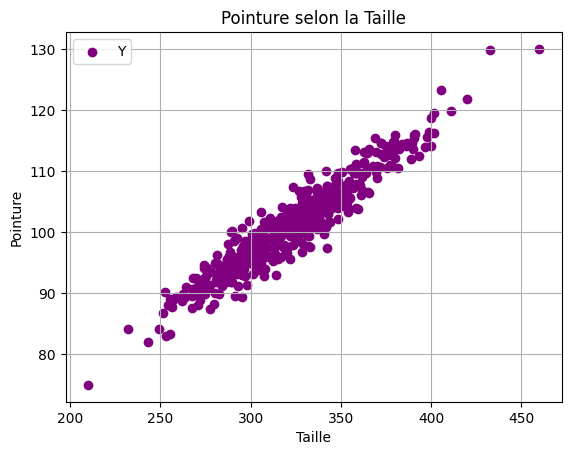

In [ ]:
plt.scatter(X, Y, color = 'Purple', marker='o', label='Y')
plt.xlabel('Hauteur')
plt.ylabel('Distance')
plt.title('Distance selon le hauteur')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
data = pd.DataFrame()
data["X"] = X
data["Y"] = Y

In [ ]:
data = pd.DataFrame()
data["X"] = X
data["Y"] = Y

A partir de X : speed, je vais chercher à prédire le height

apprentissage supervisée

y = ax + b

Pour l'utiliser en **ML** : **Y = β0 + β1X + ϵ**

In [ ]:
#Calcul de la moyenne
def calcMoyenne(X):
  n = len(X)
  somme = 0
  for i in range(0,n) :
    xi = X[i]
    somme += xi
  return somme/n

In [ ]:
print(" La moyenne de X est : ",calcMoyenne(X))

 La moyenne de X est :  324.4666573875905


In [ ]:
print(" La moyenne de Y est : ",calcMoyenne(Y))

 La moyenne de Y est :  101.4776883077427


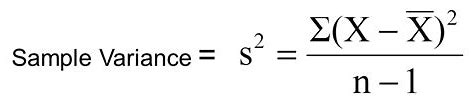

Indicateur de dispersion qui pour savoir si les données sont dispersées
autour de la moyenne

In [ ]:
#Calcul de la variance
def calcVariance(X):
  n = len(X)
  xBar = calcMoyenne(X)
  somme = 0
  for i in range(0, len(X)):
    xi = X[i]
    somme += (xi - xBar)**2
  return (1/(n-1))*somme

print("La Variance de X est de : ",calcVariance(X))
print("La Variance de Y est de : ",calcVariance(Y))

La Variance de X est de :  1195.8040122406665
La Variance de Y est de :  56.26651877471219


In [ ]:
#Calcul ecart type
def calcEcarType(X):
  variance = calcVariance(X)
  return np.sqrt(variance)

print("L'écart type de X est de :", calcEcarType(X))
print("L'écart type de Y est de :", calcEcarType(Y))

L'écart type de X est de : 34.580399249295354
L'écart type de Y est de : 7.501101170809003


In [ ]:
# calcul de la moyenne de chaque ensemble de données
moyenne_X = sum(X) / len(Y)
moyenne_Y = sum(Y) / len(Y)

# calcul de la covariance
covariance = sum((X[i] - moyenne_X) * (Y[i] - moyenne_Y) for i in range(len(X))) / (len(X) - 1)

# affichage du résultat
print("La covariance entre x et y est :", covariance)

La covariance entre x et y est : 247.09859247970672


In [ ]:
#calcul de la covariance

def calcCov(X,Y):
  n = len(X)
  xBar = calcMoyenne(X)
  yBar = calcMoyenne(Y)

  somme = 0
  for i in range(0,len(X)):
    xi = X[i]
    yi = Y[i]
    somme += (xi - xBar) * (yi - yBar)
  return (1/(n-1))*somme

print("La covariance entre x et y est :",calcCov(X,Y))

La covariance entre x et y est : 247.0985924797067


In [ ]:
#Matrice de covariance
np.cov(X,Y)

array([[1195.80401224,  247.09859248],
       [ 247.09859248,   56.26651877]])

In [ ]:
# calcul de la moyenne de chaque ensemble de données
moyenne_x = sum(X) / len(X)
moyenne_y = sum(Y) / len(Y)

# calcul de la variance de chaque ensemble de données
variance_x = sum((Xi - moyenne_x) ** 2 for Xi in X) / (len(X) - 1)
variance_y = sum((Yi - moyenne_y) ** 2 for Yi in Y) / (len(Y) - 1)

# calcul de l'écart-type de chaque ensemble de données
ecart_type_x = math.sqrt(variance_x)
ecart_type_y = math.sqrt(variance_y)

# calcul de la covariance entre les deux ensembles de données
covariance = sum((X[i] - moyenne_x) * (Y[i] - moyenne_y) for i in range(len(X))) / (len(X) - 1)

# calcul du coefficient de corrélation linéaire
coefficient_corr = covariance / (ecart_type_x * ecart_type_y)

# affichage du résultat
print("Le coefficient de corrélation linéaire entre x et y est :", coefficient_corr)

Le coefficient de corrélation linéaire entre x et y est : 0.9526102395890808


In [ ]:
covXY = calcCov(X,Y)
print("Covariance XY = ", covXY)

varianceX = calcVariance(X)
print("Variance X =",varianceX)

beta_1 = covXY / varianceX
print(beta_1)

Covariance XY =  247.0985924797067
Variance X = 1195.8040122406665
0.2066380359576648


In [ ]:
calcMoyenne(Y)

101.4776883077427

In [ ]:
XBarre = calcMoyenne(X)
YBarre = calcMoyenne(Y)
beta_0 = YBarre - beta_1 * XBarre
print(beta_0)

34.43053549142246


In [ ]:
def predire(x,beta_0,beta_1):
  return beta_0 + X * beta_1

In [ ]:
xvalues = np.arange(0,max(X) + 2, 0.1)

predictions = [44.23,41.7,43.54,41.7,43.77,48.14,39.4,39.4,39.4,41.01,44,41.7,38.25,44.46,43.54,41.7,40.78,42.39,43.54,45.15,43.77,41.93,44,40.32,35.95,39.63,43.08,43.54,41.7]

In [ ]:
# Définir les données X et Y
X = [10,175,183,175,184,203,165,165,165,172,185,175,160,187,183,175,171,178,183,190,184,176,185,169,150,166,181,183,175]
Y = [40,43,43,42,45,47,37,39,38,38,45,39,39,42,44,44,41,43,43,44,43,43.5,43,39,36,38,44,42,43]

# Créer un DataFrame à partir des données X et Y
df = pd.DataFrame({'X': X, 'Y': Y})

# Créer un objet de modèle de régression linéaire
model = LinearRegression()

# Entraîner le modèle sur les données existantes
model.fit(df[['X']], df['Y'])

# Obtenir les coefficients de régression linéaire
beta1 = model.coef_[0]
beta0 = model.intercept_

# Prédire les valeurs de ^Y en utilisant le modèle entraîné
df['^Y'] = model.predict(df[['X']])

# Ajouter une colonne 'diff' pour calculer la différence entre Y et ^Y
df['diff'] = df['Y'] - df['^Y']

# Calculer la MSE et RMSE
mse = mean_squared_error(df['Y'], df['^Y'])
rmse = np.sqrt(mse)

# Afficher les résultats
print('beta0: ', beta0)
print('beta1: ', beta1)
print('MSE: ', mse)
print('RMSE: ', rmse)

# Afficher le DataFrame mis à jour
print(df)

beta0:  36.10918857726971
beta1:  0.03237099359159669
MSE:  6.31722975017842
RMSE:  2.513409984498832
      X     Y         ^Y      diff
0    10  40.0  36.432899  3.567101
1   175  43.0  41.774112  1.225888
2   183  43.0  42.033080  0.966920
3   175  42.0  41.774112  0.225888
4   184  45.0  42.065451  2.934549
5   203  47.0  42.680500  4.319500
6   165  37.0  41.450403 -4.450403
7   165  39.0  41.450403 -2.450403
8   165  38.0  41.450403 -3.450403
9   172  38.0  41.676999 -3.676999
10  185  45.0  42.097822  2.902178
11  175  39.0  41.774112 -2.774112
12  160  39.0  41.288548 -2.288548
13  187  42.0  42.162564 -0.162564
14  183  44.0  42.033080  1.966920
15  175  44.0  41.774112  2.225888
16  171  41.0  41.644628 -0.644628
17  178  43.0  41.871225  1.128775
18  183  43.0  42.033080  0.966920
19  190  44.0  42.259677  1.740323
20  184  43.0  42.065451  0.934549
21  176  43.5  41.806483  1.693517
22  185  43.0  42.097822  0.902178
23  169  39.0  41.579886 -2.579886
24  150  36.0  40.96483

In [ ]:
# Convertir les listes X et Y en un tableau numpy 2D
data = np.column_stack((X, Y))

# Calculer les quartiles Q1 et Q3 pour chaque colonne
Q1 = np.percentile(data, 25, axis=0)
Q3 = np.percentile(data, 75, axis=0)

# Calculer l'écart interquartile (IQR) pour chaque colonne
IQR = Q3 - Q1

# Définir les limites supérieure et inférieure pour détecter les valeurs aberrantes
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Trouver les indices des valeurs aberrantes pour chaque colonne
outliers_X = np.where((data[:,0] > upper_bound[0]) | (data[:,0] < lower_bound[0]))
outliers_Y = np.where((data[:,1] > upper_bound[1]) | (data[:,1] < lower_bound[1]))

# Afficher les indices des valeurs aberrantes
print("Indices des valeurs aberrantes pour X :", outliers_X)
print("Indices des valeurs aberrantes pour Y :", outliers_Y)

Indices des valeurs aberrantes pour X : (array([0]),)
Indices des valeurs aberrantes pour Y : (array([], dtype=int64),)


In [ ]:
print(np.array(X).shape)  # Affiche la forme de X
print(np.array(Y).shape)  # Affiche la forme de Y



reg = LinearRegression().fit(np.array(X).reshape(-1,1),Y)

print(reg.coef_) #Beta 1, Beta 2, ...., Beta n
print(reg.intercept_) #Beta 0

(29,)
(29,)
[0.03237099]
36.10918857726971


In [ ]:
MSE = mean_squared_error(Y, predictions)
RMSE = mean_squared_error(Y,predictions, squared=False)
print(MSE)
print(RMSE)

2.604310344827584
1.6137875773557016
